## Regras gerais:

    - A resolução deve ser realizada individualmente
    - Pode realizar buscas na internet (Google) ou consultar os arquivos das aulas anteriores, mas não deve trocar informações com os demais colegas

## Avaliação de alternativas de projetos

Os dados do arquivo `projetos.csv` se referem aos valores futuros previstos para receita mensal de 5 projetos diferentes. A análise dos dados permitirá a decisão sobre o investitmento em um ou mais alternativas de projetos. Neste cenário, os dados futuros se referem ao período de 2025 e 2026.

1) Nesta etapa, faça o carregamento dos dados e apresente a df completa. (Peso: 1,0)

In [1]:
!pip install streamlit
import streamlit as st
st.set_page_config(
    page_title="Título da página",
    page_icon="👋",
)

import pandas as pd

arquivo = "projetos.csv"
df = pd.read_csv(arquivo, sep=';')
st.dataframe(df.head(len(df)))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


2025-06-10 14:23:47.131 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 14:23:47.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-10 14:23:47.560 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-10 14:23:47.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

2) Atualize a DataFrame criado no Exe1, adicionando mais uma linha ao final com os dados referentes ao mês de dezembro de 2026. Depois apresente as últimas linhas da df para checar se ocorreu como deveria. (Peso: 2,0)

mes | ano | Projeto1 | Projeto2 | Projeto3 | Projeto4 | Projeto5
--- | --- | -------- | -------- | -------- | -------- | --------
12 | 2026 | 29376 | 40392 | 63648 | 29376 | 25704


Dica: o método `append` parou de funcionar como alternativa para incluir dados ao final do DataFrame. Sugiro utilizar o método `concat`

obs: a partir deste ponto, utilize a df atualizada, agora com 24 meses de dados

In [ ]:
df1 = pd.DataFrame({'mes': [12], 'ano': [2026], 'Projeto1': [29376], 'Projeto2': [40392], 'Projeto3': [63648], 'Projeto4': [29376], 'Projeto5': [25704] })
df = pd.concat([df, df1])
df.head(len(df))

,mes,ano,Projeto1,Projeto2,Projeto3,Projeto4,Projeto5
0,1,2025,35000,33000,65000,30000,27660
1,2,2025,32500,42600,53000,39000,24999
2,3,2025,26700,35800,48000,36000,27104
3,4,2025,24000,28700,58000,27000,27487
4,5,2025,19000,35200,49000,32000,30394
5,6,2025,22000,44950,47500,39500,30469
6,7,2025,23900,31640,58600,29000,30112
7,8,2025,25400,33550,48500,30000,29908
8,9,2025,23200,36980,65000,32000,25878
9,10,2025,24700,33240,49000,31000,26110


3) Apresente a soma dos valores de cada projeto agrupado por ano. (Peso: 1,0)

In [ ]:
colunas = ['Projeto1', 'Projeto2', 'Projeto3', 'Projeto4', 'Projeto5']
df.groupby('ano')[colunas].sum()

,Projeto1,Projeto2,Projeto3,Projeto4,Projeto5
ano,,,,,
2025,305500,425230,656600,377500,330677
2026,330083,457698,708030,404890,354970


4) Deseja-se calcular o Valor Presente (VP) de cada projeto, considerando uma taxa de juros mensal constante de 2%. Para isto, crie uma função `valor_presente(fluxos, taxa)` e depois aplique a função para calcular o VP de todos os projetos. (Peso: 2,0)

Dicas:
- A função `valor_presente` deve receber uma variável que contém lista/série e valor da taxa (formato número, exemplo 0.02)
- Dentro da função, deve percorrer a lista e calcular o valor presente de cada valor: VP = `valor - (valor * (taxa**t))`
- Ao final da repetição deve retornar com a soma dos VP de cada mês
- Utilize a função para calcular e apresentar o VP de cada projeto, utilizando taxa de juros de 2% para calcular. Deve apresentar os VP em formato R$ e com duas casas decimais

In [ ]:
def valor_presente(fluxos, taxa):
    total = 0
    for t, valor in enumerate(fluxos):
      VP = valor / ((1 + taxa) ** (t + 1))
      total = total + VP
    return total

st.write("Valor Presente dos projetos:")
st.write(f"Projeto1: R$ {valor_presente(df['Projeto1'], 0.02):,.2f}")
st.write(f"Projeto2: R$ {valor_presente(df['Projeto2'], 0.02):,.2f}")
st.write(f"Projeto3: R$ {valor_presente(df['Projeto3'], 0.02):,.2f}")
st.write(f"Projeto4: R$ {valor_presente(df['Projeto4'], 0.02):,.2f}")
st.write(f"Projeto5: R$ {valor_presente(df['Projeto5'], 0.02):,.2f}")

NameError: name 'st' is not defined

In [ ]:
def valor_presente(fluxos, taxa):
    total = 0
    for t, valor in enumerate(fluxos):
      VP = valor - (valor * (taxa**t))
      total = total + VP
    return total

print("Valor Presente dos projetos:")
print(f"Projeto1: R$ {valor_presente(df['Projeto1'], 0.02):,.2f}")
print(f"Projeto2: R$ {valor_presente(df['Projeto2'], 0.02):,.2f}")
print(f"Projeto3: R$ {valor_presente(df['Projeto3'], 0.02):,.2f}")
print(f"Projeto4: R$ {valor_presente(df['Projeto4'], 0.02):,.2f}")
print(f"Projeto5: R$ {valor_presente(df['Projeto5'], 0.02):,.2f}")

Valor Presente dos projetos:
Projeto1: R$ 599,922.12
Projeto2: R$ 849,061.44
Projeto3: R$ 1,298,550.33
Projeto4: R$ 751,595.38
Projeto5: R$ 657,475.95


5) Gere um gráfico de dispersão cruzando os dados do `Projeto1` e `Projeto2`, com marcadores verdes e em formato de estrela. (Peso: 2,0)

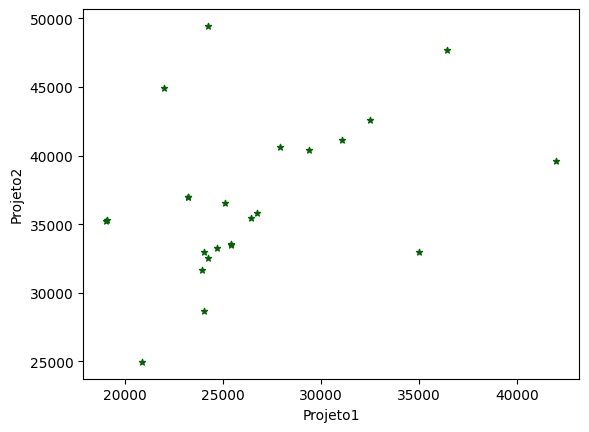

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind = 'scatter', x = 'Projeto1', y = 'Projeto2', color='darkgreen', marker='*')
plt.show()

6) Crie um gráfico de linha que mostre a evolução dos valores dos projetos ao longo do tempo. (Peso: 2,0)

Dicas:
- Antes de plotar, deve criar uma nova variável `Data` que surgirá da concatenação de `ano` e `mês`. Para isto pode utilizar a função to_datetime: `pd.to_datetime(dict(year=df["ano"], month=df["mes"], day=1))`
- Depois, ordene a df utilizando a nova variável `Data`, utilizando `sort_values()`
- Para conseguir apresentar mais de uma variável (todos os projetos) no mesmo gráfico, uma dica importante está no funcionamento do pacote `matplotlib`
  - A lógica de plotar gráfico no `matplotlib` segue o caminho das funções figure (inicia ação), plot (monta o gráfico) e show (apresenta). Logo, todos os plot que forem montados entre o figure e o show vão aparecer no mesmo gráfico
  - `plt.figure(figsize=(10,6))`
  - `plt.plot()`
  - `plt.show()`

In [ ]:
df["Data"] = pd.to_datetime(dict(year=df["ano"], month=df["mes"], day=1))

df = df.sort_values("Data")
df

,mes,ano,Projeto1,Projeto2,Projeto3,Projeto4,Projeto5,Data
0,1,2025,35000,33000,65000,30000,27660,2025-01-01
1,2,2025,32500,42600,53000,39000,24999,2025-02-01
2,3,2025,26700,35800,48000,36000,27104,2025-03-01
3,4,2025,24000,28700,58000,27000,27487,2025-04-01
4,5,2025,19000,35200,49000,32000,30394,2025-05-01
5,6,2025,22000,44950,47500,39500,30469,2025-06-01
6,7,2025,23900,31640,58600,29000,30112,2025-07-01
7,8,2025,25400,33550,48500,30000,29908,2025-08-01
8,9,2025,23200,36980,65000,32000,25878,2025-09-01
9,10,2025,24700,33240,49000,31000,26110,2025-10-01


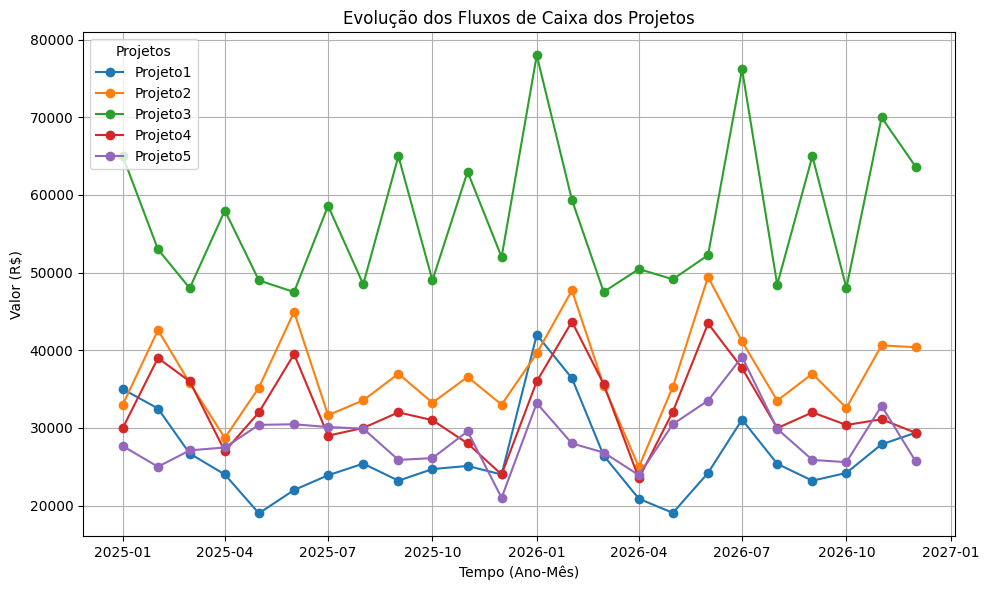

In [ ]:

projetos = ["Projeto1", "Projeto2", "Projeto3", "Projeto4", "Projeto5"]

plt.figure(figsize=(10,6))
for projeto in projetos:
    plt.plot(df["Data"], df[projeto], marker="o", label=projeto)

plt.title("Evolução dos Fluxos de Caixa dos Projetos")
plt.xlabel("Tempo (Ano-Mês)")
plt.ylabel("Valor (R$)")
plt.legend(title="Projetos")
plt.grid(True)
plt.tight_layout()
plt.show()